<a href="https://colab.research.google.com/github/brentosaurus/course22/blob/master/00%20(modified).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up all libraries

In [1]:
!pip install -Uqq fastai duckduckgo_search
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

## Delete all files, so files from the last run don't contaminate this run

In [6]:
!rm -r *

## Download several of each type of image

In [7]:
#things = ['thomas cole painting', 'turner painting']
#things = ['jack kirby original art', 'steve ditko original art']
#things = ['Frederic Edwin Church painting', 'Albert Bierstadt painting']
#things = ['hot dog', 'hamburger', 'pizza', 'steak']
#things = ['cynthia hamilton painting', 'john singer sargent painting']
things = ['photo of man face with white background', 'photo of woman face with white background']

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    result = L(ddg_images(term, max_results=max_images)).itemgot('image')
    #print(result)
    return result

path = Path('art')
for thing in things:
    destPath = (path/thing)
    destPath.mkdir(exist_ok=True, parents=True)
    download_images(destPath, urls=search_images(thing))
    sleep(2)
    resize_images(destPath, max_size=400, dest=destPath)

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print('--- failed images:', len(failed))

Searching for 'photo of man face with white background'


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Searching for 'photo of woman face with white background'
--- failed images: 0


## Set up the AI magic, based on these images

epoch,train_loss,valid_loss,error_rate,time
0,1.593835,2.185308,0.454545,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.991253,1.537232,0.363636,00:00
1,0.715077,0.679793,0.363636,00:00
2,0.616322,0.385608,0.272727,00:00


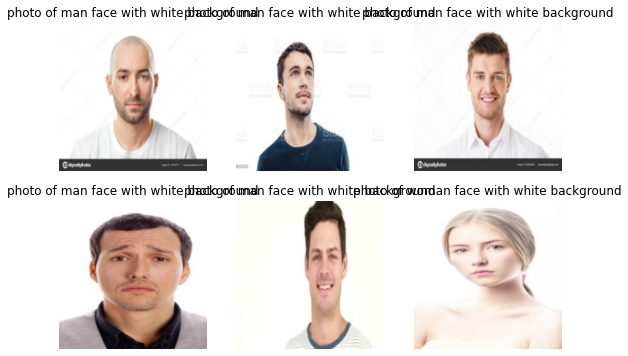

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=16) # WAS 32

dls.show_batch(max_n=6)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

## Download some more images, to see how well the AI works

In [9]:
#@title
import math

right = wrong = 0
show_all = False        # if False then only show wrong answers
for thing in things:
    urls = search_images(thing, max_images=4)
    #print(urls)

    for url in urls:
        #print('testing', url)
        download_url(url, 'test.jpg', show_progress=False)
        category,_,probs = learn.predict(PILImage.create('test.jpg'))
        if show_all or category != thing:
            display(Image.open('test.jpg').to_thumb(256, 256))
            print(f"This is a: {category}, probabilities: {[round(float(ff),2) for ff in probs]} {'' if category == thing else ' (WRONG!)'}\n")

        if category == thing:
            right += 1
        else:
            wrong += 1

print(f'{right} right, {wrong} wrong')

Searching for 'photo of man face with white background'


Searching for 'photo of woman face with white background'


8 right, 0 wrong
